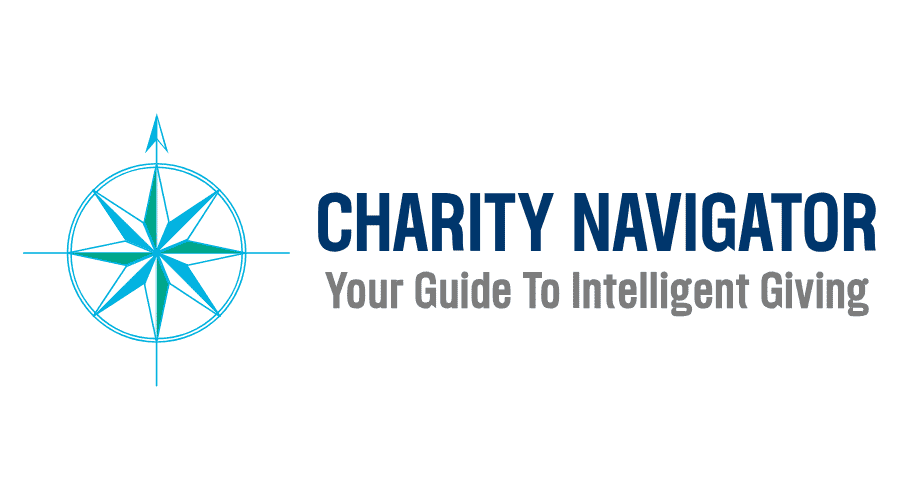

## Content
Charity Navigator is a major charity assessment organization that evaluates charitable organizations in the United States, operating as a free 501(c)(3) organization that accepts no advertising or donations from the organizations it evaluates.

The data is a public service of Charity Navigator, but the data is likely owned by individual charities. Charity Navigator collects this data. This data was webscraped in May 2019 but uses rating details mostly from 2021. For the most updated information, read about the Charity Navigator Search API HERE and learn how to apply for access.

##  Acknowledgements

Charity Navigator makes this data available as a public service. Read more about their Rating Methodology HERE and if you would like to support them, please donate HERE.


## Some Exploratory Questions

- Which states have the most rated charities, the least?
- Do larger or smaller charities spend more on fundraising efforts?
- Which categories or causes of charities tend to compensate their leaders the most?
- Is there any correlation between financial score & accountability score?







## The Features 
1. ascore - Accountability & Transparency Score -  %.
2. Category - 
3. description- Mission & Description -
4. EIN -  ID number -
5. tot_exp - Total Expenses in  (Program , Funding ,Administrative) .
6. admin_exp_p - Administrative Expenses Percentage (of total expenses)%.
7. fund_eff - Funding Efficiency in  (amount spent to raise 1 in donations) .
8. fund_exp_p - Funding Expenses Percentage (of total expenses).
9. program_exp_p - Program Expenses Percentage (of total expenses).
10. fscore - Financial Score (out of 100)
11. leader - Name of Leader 
12. leader_comp- Compensation of Leader in .
13. leader_comp_p-Compensation of Leader Percentage.
14. motto-Tagline.
15. name -Name of Charity.
16. tot_rev-Total Revenue .
17. score- Overall Score (out of 100).
18. state - State.
19. subcategory- Subcategory.
20. size- Size of Charity (based on Total Expenses).
21. program_exp-Program Expenses in  (amount spent on program & services it delivers).
22. fund_exp - Funding Expenses in  (amount spent on raising money).
23. admin_exp -Administrative Expenses in $ (amount spent on overhead, staff, meeting costs).



# Import libraries and Data

In [1]:
#import the necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)


In [2]:
pip install plotly-express


Note: you may need to restart the kernel to use updated packages.


In [3]:
import plotly_express as px
from plotly.offline import init_notebook_mode

In [4]:
df_or=pd.read_csv('../input/charity-navigator-scores-expenses-dataset/CLEAN_charity_data.csv')

In [5]:
df_or.head(3)

,ascore,category,description,ein,tot_exp,admin_exp_p,fund_eff,fund_exp_p,program_exp_p,fscore,...,motto,name,tot_rev,score,state,subcategory,size,program_exp,fund_exp,admin_exp
0,100.0,Environment,Working with Oregonians to enhance our quality...,93-0642086,917313.0,0.101,0.18,0.184,0.714,88.61,...,Great communities. Working lands. Iconic Places.,1000 Friends of Oregon,1022513.0,91.94,OR,Environmental Protection and Conservation,small,654961.482,168785.592,92648.613
1,89.0,"Arts, Culture, Humanities",Serving the metropolitan Baltimore area and th...,31-1770828,5053059.0,0.231,0.05,0.032,0.735,82.85,...,88.1 FM -. Your NPR News Station,WYPR,5685761.0,85.59,MD,Public Broadcasting and Media,mid,3713998.365,161697.888,1167256.629
2,70.0,Religion,VSS Catholic Communications is dedicated to an...,91-1857425,1891500.0,0.114,0.17,0.197,0.687,86.74,...,Spirit Catholic Radio Network,VSS Catholic Communications,2140836.0,76.80,NE,Religious Media and Broadcasting,small,1299460.500,372625.500,215631.000


In [6]:
df_or.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 0 to 8407
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ascore         8408 non-null   float64
 1   category       8408 non-null   object 
 2   description    8408 non-null   object 
 3   ein            8408 non-null   object 
 4   tot_exp        8408 non-null   float64
 5   admin_exp_p    8408 non-null   float64
 6   fund_eff       8408 non-null   float64
 7   fund_exp_p     8408 non-null   float64
 8   program_exp_p  8408 non-null   float64
 9   fscore         8408 non-null   float64
 10  leader         8408 non-null   object 
 11  leader_comp    7972 non-null   float64
 12  leader_comp_p  7972 non-null   float64
 13  motto          8395 non-null   object 
 14  name           8408 non-null   object 
 15  tot_rev        8408 non-null   float64
 16  score          8408 non-null   float64
 17  state          8408 non-null   object 
 18  subcateg

In [7]:
df_or[['description','motto','ein','leader']]

,description,motto,ein,leader
0,Working with Oregonians to enhance our quality...,Great communities. Working lands. Iconic Places.,93-0642086,Lynn Peterson
1,Serving the metropolitan Baltimore area and th...,88.1 FM -. Your NPR News Station,31-1770828,Anthony S. Brandon
2,VSS Catholic Communications is dedicated to an...,Spirit Catholic Radio Network,91-1857425,Jim Carroll
3,The mission of the Utah Symphony & Opera is to...,"Engaging, educating, and enriching lives",51-0145980,Paul Meecham
4,"Funded solely by the footwear industry, Two Te...",Shoepeople Helping Shoepeople,22-2579809,Neal Newman
...,...,...,...,...
8403,"Founded in 1900, Yaddo is an artists' communit...",Nurturing the creative process,14-1343055,Elaina Richardson
8404,Yad L'Achim was established in 1950. It is a n...,Promoting the adherence to Orthodox Jewish obs...,23-7126417,This organization did not report a CEO
8405,Yad Ezra opened its doors in 1990 with the pur...,Feeding the Jewish hungry,38-2904733,Lea Luger
8406,"Rawhide, where commitment and compassion meet....",Dedicated to helping at-risk youth and their f...,39-1052471,John Solberg


## Data Restructure
### - Reorder the features because they don't make sense in order to make the data easier to read
### - Drop 4 columns because it has a lot of description and explanation and may be useful in another project 
1. description: Mission & Description 
2. ein: : Name of Leader
3. leader: Name of Leader
4. motto::Tagline like slogan




In [8]:
df_re= df_or[[ 'name','state','category','subcategory','tot_rev','tot_exp','size','admin_exp','admin_exp_p','fund_exp','fund_exp_p','fund_eff','program_exp','program_exp_p','leader_comp','leader_comp_p','fscore','ascore','score']]
df_re.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8408 entries, 0 to 8407
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8408 non-null   object 
 1   state          8408 non-null   object 
 2   category       8408 non-null   object 
 3   subcategory    8408 non-null   object 
 4   tot_rev        8408 non-null   float64
 5   tot_exp        8408 non-null   float64
 6   size           8408 non-null   object 
 7   admin_exp      8408 non-null   float64
 8   admin_exp_p    8408 non-null   float64
 9   fund_exp       8408 non-null   float64
 10  fund_exp_p     8408 non-null   float64
 11  fund_eff       8408 non-null   float64
 12  program_exp    8408 non-null   float64
 13  program_exp_p  8408 non-null   float64
 14  leader_comp    7972 non-null   float64
 15  leader_comp_p  7972 non-null   float64
 16  fscore         8408 non-null   float64
 17  ascore         8408 non-null   float64
 18  score   

In [9]:
df_re.head(3)

,name,state,category,subcategory,tot_rev,tot_exp,size,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
0,1000 Friends of Oregon,OR,Environment,Environmental Protection and Conservation,1022513.0,917313.0,small,92648.613,0.101,168785.592,0.184,0.18,654961.482,0.714,0.0,0.0000,88.61,100.0,91.94
1,WYPR,MD,"Arts, Culture, Humanities",Public Broadcasting and Media,5685761.0,5053059.0,mid,1167256.629,0.231,161697.888,0.032,0.05,3713998.365,0.735,163341.0,0.0323,82.85,89.0,85.59
2,VSS Catholic Communications,NE,Religion,Religious Media and Broadcasting,2140836.0,1891500.0,small,215631.000,0.114,372625.500,0.197,0.17,1299460.500,0.687,114791.0,0.0606,86.74,70.0,76.80


# Data Exploration

small    4050
mid      2908
big      1450
Name: size, dtype: int64


<AxesSubplot:xlabel='size', ylabel='count'>

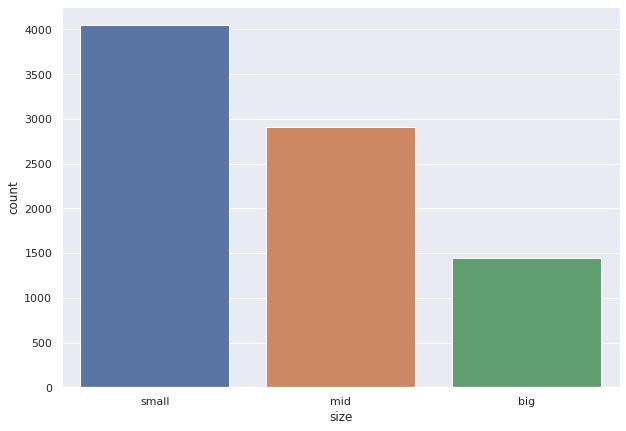

In [10]:
print (df_re['size'].value_counts())
plt.figure(figsize = (10,7))
sns.countplot(x="size", data=df_re)

Human Services                2379
Arts, Culture, Humanities     1218
Health                         847
Community Development          803
Education                      667
International                  610
Animals                        454
Religion                       450
Environment                    429
Human and Civil Rights         346
Research and Public Policy     205
Name: category, dtype: int64


<AxesSubplot:xlabel='count', ylabel='category'>

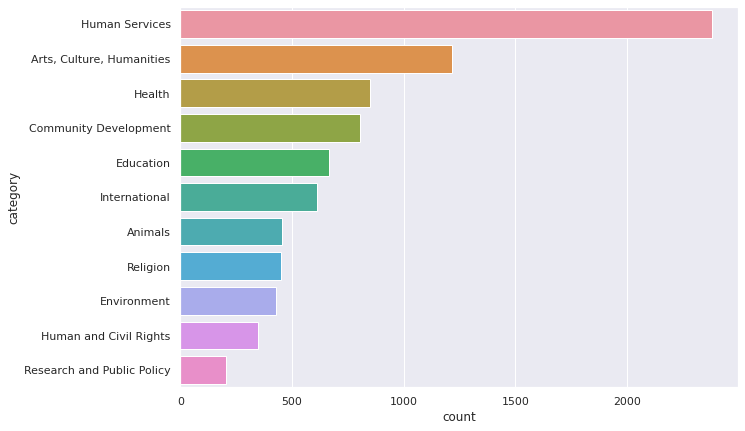

In [11]:
print( df_re['category'].value_counts())
plt.figure(figsize = (10,7))
sns.countplot(y="category", data=df_re,order = df_re['category'].value_counts().index)



<AxesSubplot:xlabel='count', ylabel='subcategory'>

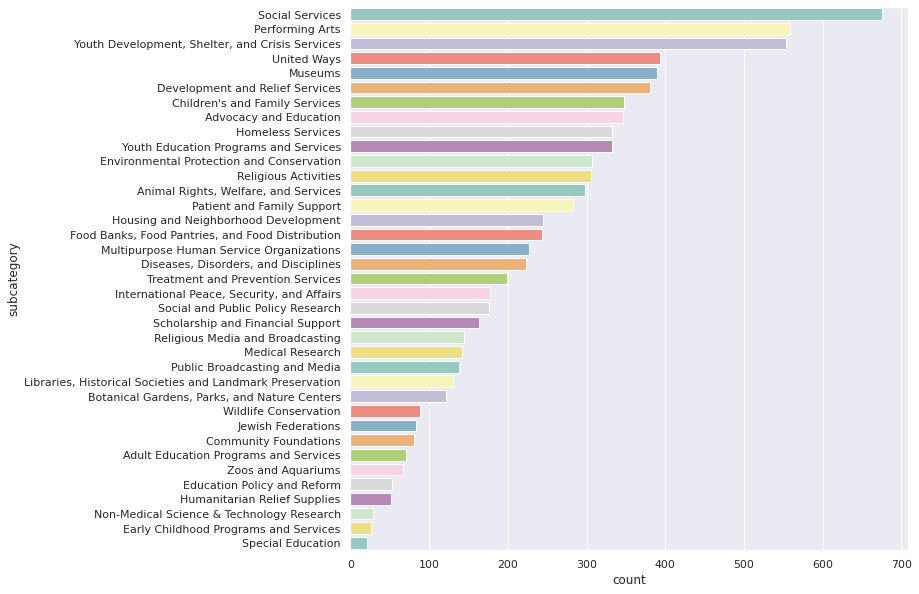

In [12]:
plt.figure(figsize = (10,10))
sns.countplot(y="subcategory", data=df_re, palette="Set3",order = df_re['subcategory'].value_counts().index)



In [13]:
df_re.describe(include = "object")

,name,state,category,subcategory,size
count,8408,8408,8408,8408,8408
unique,8405,53,11,37,3
top,United Way of Forsyth County,CA,Human Services,Social Services,small
freq,2,992,2379,675,4050


In [14]:
df_re.loc[df_re['name']=='United Way of Anderson County']

,name,state,category,subcategory,tot_rev,tot_exp,size,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
4030,United Way of Anderson County,TN,Community Development,United Ways,1180003.0,1117648.0,small,115117.744,0.103,92764.784,0.083,0.08,908647.824,0.813,NaN,NaN,83.94,81.0,82.40
4031,United Way of Anderson County,SC,Community Development,United Ways,2067257.0,2197904.0,small,145061.664,0.066,219790.400,0.100,0.10,1828656.128,0.832,101037.0,0.0459,79.48,93.0,84.66


In [15]:
print(df_re.duplicated().sum())


0


In [16]:
df_re['state'].value_counts()

CA    992
NY    963
TX    465
DC    447
FL    423
MA    344
VA    316
IL    309
PA    293
OH    250
CO    246
WA    213
MN    209
GA    207
MI    201
NC    195
TN    176
MD    167
NJ    166
MO    156
CT    130
IN    129
WI    129
AZ    124
OR    115
OK     80
SC     75
KY     73
AL     66
NE     61
LA     60
KS     57
UT     50
ME     48
IA     47
MT     44
MS     37
NM     36
NH     33
NV     33
RI     31
AR     31
VT     30
HI     28
SD     23
DE     23
ID     20
AK     17
WV     15
WY     13
ND      8
PR      3
VI      1
Name: state, dtype: int64

In [17]:
df_re.describe()

,tot_rev,tot_exp,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
count,8.408000e+03,8.408000e+03,8.408000e+03,8408.000000,8.408000e+03,8408.000000,8408.000000,8.408000e+03,8408.000000,7.972000e+03,7972.000000,8408.000000,8408.000000,8408.000000
mean,1.582723e+07,1.448428e+07,1.138578e+06,0.105755,8.929307e+05,0.087736,0.108110,1.243070e+07,0.805006,1.641593e+05,0.039070,85.946183,90.724905,86.866904
std,7.557658e+07,6.943732e+07,4.362716e+06,0.063382,4.355882e+06,0.064882,0.087982,6.349472e+07,0.094131,1.453191e+05,0.034743,9.755404,9.771194,8.046299
min,-2.049209e+06,5.321300e+04,3.348400e+02,0.001000,3.328500e+02,0.001000,0.010000,3.500383e+04,0.047000,0.000000e+00,0.000000,0.000000,28.000000,14.480000
25%,2.022281e+06,1.942998e+06,1.788179e+05,0.063000,1.421605e+05,0.045000,0.050000,1.509136e+06,0.757000,8.997500e+04,0.015000,81.130000,89.000000,83.260000
50%,3.951672e+06,3.656226e+06,3.437180e+05,0.095000,2.935981e+05,0.077000,0.090000,2.930645e+06,0.814000,1.316330e+05,0.031550,87.460000,93.000000,88.310000
75%,9.785276e+06,8.859808e+06,7.745598e+05,0.135000,6.431633e+05,0.115000,0.140000,7.215094e+06,0.865000,1.977480e+05,0.053900,92.500000,97.000000,92.020000
max,3.608002e+09,3.142984e+09,1.574086e+08,0.742000,2.011510e+08,0.916000,1.430000,2.809828e+09,0.997000,3.691019e+06,0.532300,100.000000,100.000000,100.000000


In [18]:
df_re.loc[df_re['tot_rev']<10]

,name,state,category,subcategory,tot_rev,tot_exp,size,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
1655,The Negev Foundation,OH,International,Development and Relief Services,-700136.0,471259.0,small,118757.268,0.252,17436.583,0.037,0.07,334122.631,0.709,163461.0,0.3468,81.18,81.0,81.08
4742,America's Packard Museum,OH,"Arts, Culture, Humanities",Museums,-836716.0,358766.0,small,93637.926,0.261,15426.938,0.043,0.01,248983.604,0.694,NaN,NaN,90.87,62.0,72.36
6616,Camp Soaring Eagle Foundation,AZ,Health,Patient and Family Support,-777555.0,468778.0,small,83911.262,0.179,88130.264,0.188,0.36,295798.918,0.631,NaN,NaN,48.74,36.0,42.01
6622,Camp Korey,WA,Health,Patient and Family Support,-2049209.0,4884551.0,mid,600799.773,0.123,962256.547,0.197,0.21,3316610.129,0.679,23077.0,0.0047,69.21,96.0,78.04


In [19]:
df_re.loc[df_re['fscore']<10]

,name,state,category,subcategory,tot_rev,tot_exp,size,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
599,Karen Ann Quinlan Charitable Foundation,NJ,Health,Patient and Family Support,833079.0,478763.0,small,238423.974,0.498,1.579918e+05,0.330,0.32,81389.710,0.170,0.0,0.0000,0.0,89.0,28.86
848,Law Enforcement Education Program,MI,Human Services,Multipurpose Human Service Organizations,1336105.0,1443890.0,small,167491.240,0.116,1.191209e+06,0.825,0.83,83745.620,0.058,0.0,0.0000,0.0,62.0,24.35
1612,The New Criterion,NY,"Arts, Culture, Humanities",Public Broadcasting and Media,2689918.0,2161855.0,small,1357644.940,0.628,1.751103e+05,0.081,0.10,624776.095,0.289,147075.0,0.0680,0.0,81.0,28.02
1942,Organ Donation And Transplant Association Of A...,FL,Health,Medical Research,71653.0,117858.0,small,51268.230,0.435,3.146809e+04,0.267,0.18,35003.826,0.297,0.0,0.0000,0.0,74.0,26.93
2079,Purple Heart Foundation,VA,Human Services,Social Services,27546728.0,32780857.0,big,1311234.280,0.040,2.360222e+07,0.720,0.68,7834624.823,0.239,185000.0,0.0056,0.0,86.0,28.59
4172,Veterans Support Foundation,MD,Human Services,Social Services,4855401.0,4546213.0,mid,1359317.687,0.299,2.323115e+06,0.511,0.49,859234.257,0.189,0.0,0.0000,0.0,89.0,28.86
4333,Wishing Well Foundation USA,LA,Health,Patient and Family Support,703192.0,707871.0,small,80697.294,0.114,5.896565e+05,0.833,0.84,36101.421,0.051,NaN,NaN,0.0,32.0,14.48
4520,Autism Spectrum Disorder Foundation,IN,Health,"Diseases, Disorders, and Disciplines",2711131.0,2739355.0,small,49308.390,0.018,2.188745e+06,0.799,0.79,495823.255,0.181,303486.0,0.1107,0.0,60.0,23.84
4764,The American Spectator Foundation,VA,"Arts, Culture, Humanities",Public Broadcasting and Media,1053754.0,845863.0,small,493138.129,0.583,1.015036e+05,0.120,0.10,249529.585,0.295,127910.0,0.1512,0.0,69.0,25.96
5728,The Creative Coalition,NY,Human and Civil Rights,Advocacy and Education,1650674.0,1738283.0,small,344180.034,0.198,8.969540e+05,0.516,0.64,493672.372,0.284,258250.0,0.1485,0.0,73.0,26.75


In [20]:
df_re.loc[df_re['leader_comp']==0].head()

,name,state,category,subcategory,tot_rev,tot_exp,size,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
0,1000 Friends of Oregon,OR,Environment,Environmental Protection and Conservation,1022513.0,917313.0,small,92648.613,0.101,168785.592,0.184,0.18,654961.482,0.714,0.0,0.0,88.61,100.0,91.94
30,Issaquah Schools Foundation,WA,Education,Scholarship and Financial Support,1884567.0,1780418.0,small,254599.774,0.143,268843.118,0.151,0.14,1253414.272,0.704,0.0,0.0,80.82,96.0,86.14
52,Iranian American Jewish Federation of New York,NY,Community Development,Jewish Federations,4440104.0,4104978.0,mid,147779.208,0.036,410497.800,0.100,0.08,3538491.036,0.862,0.0,0.0,97.50,100.0,98.23
65,Interstitial Cystitis Association,VA,Health,"Diseases, Disorders, and Disciplines",547011.0,766632.0,small,65930.352,0.086,91229.208,0.119,0.17,607939.176,0.793,0.0,0.0,70.87,94.0,78.96
71,International Waldenstrom's Macroglobulinemia ...,FL,Health,Medical Research,2810867.0,2762604.0,small,193382.280,0.070,375714.144,0.136,0.11,2187982.368,0.792,0.0,0.0,93.34,100.0,95.29


In [21]:
df_re.isnull().sum()

name               0
state              0
category           0
subcategory        0
tot_rev            0
tot_exp            0
size               0
admin_exp          0
admin_exp_p        0
fund_exp           0
fund_exp_p         0
fund_eff           0
program_exp        0
program_exp_p      0
leader_comp      436
leader_comp_p    436
fscore             0
ascore             0
score              0
dtype: int64

<AxesSubplot:>

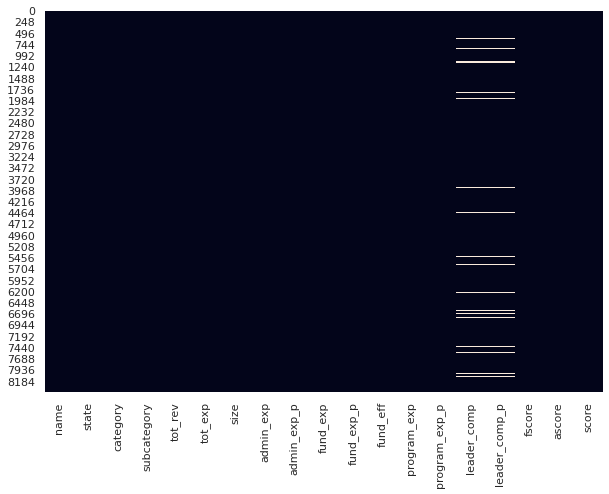

In [22]:
plt.figure(figsize = (10,7))

sns.heatmap( df_re.isnull(),cbar=False)

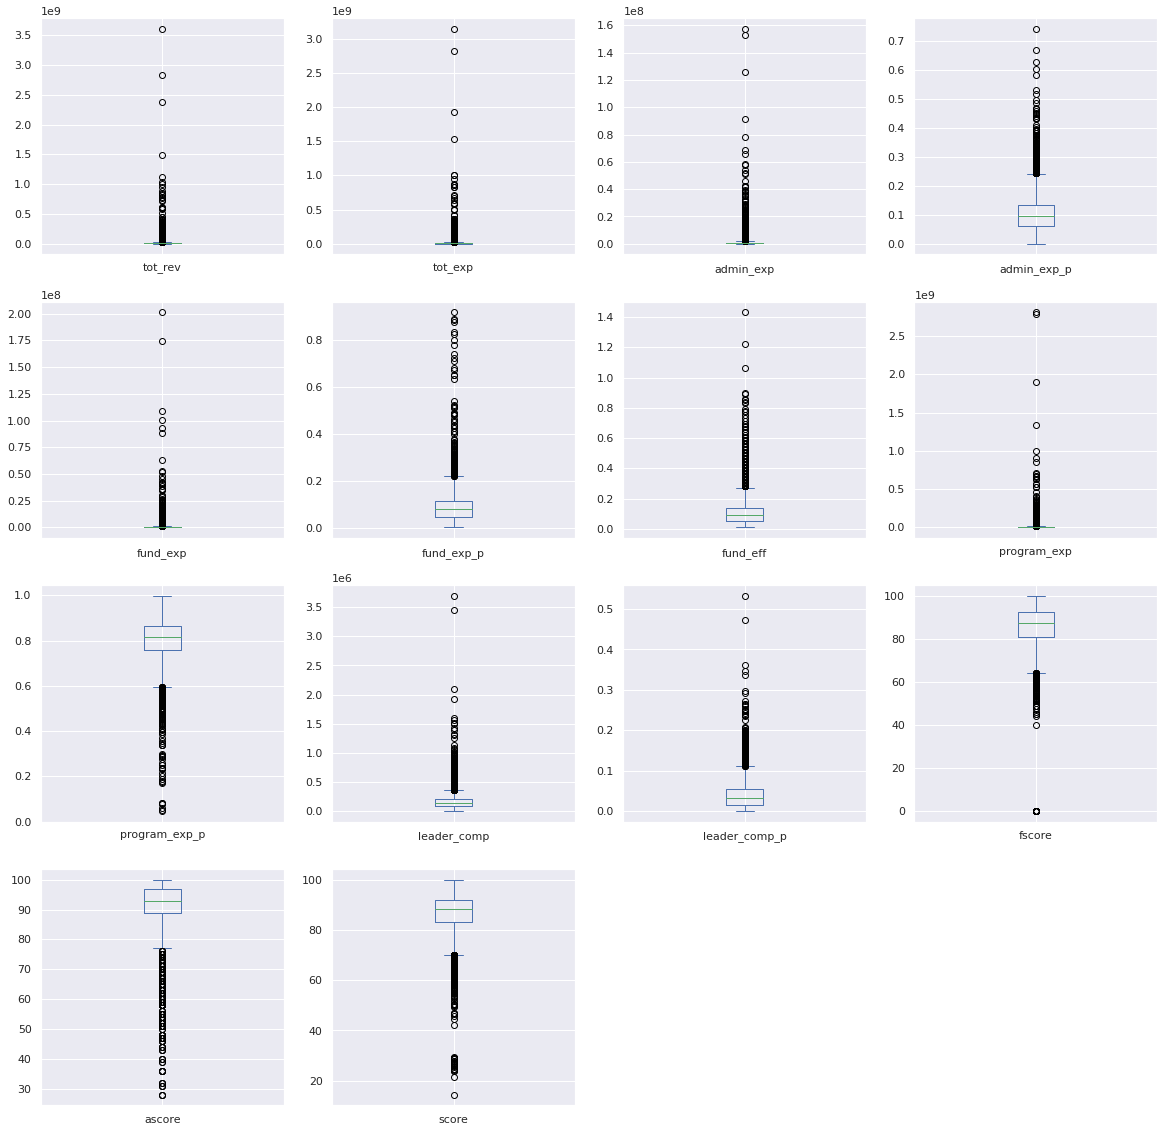

In [23]:
df_re.plot(kind = "box" , subplots = True , figsize = (20,20) ,  layout = (4,4))
plt.show()

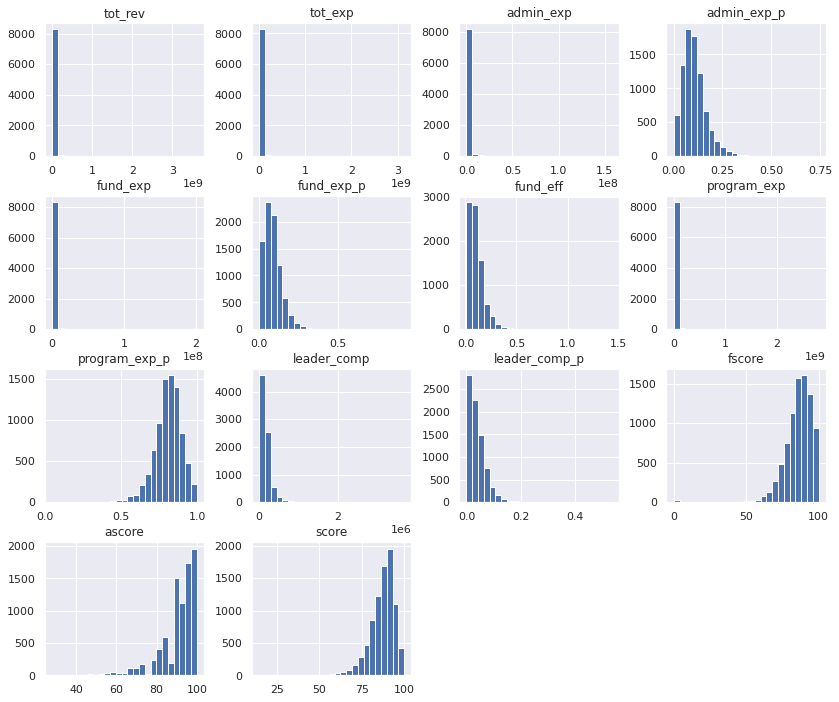

In [24]:
df_re.hist(bins=25,figsize=(14,12))
plt.show()

<AxesSubplot:>

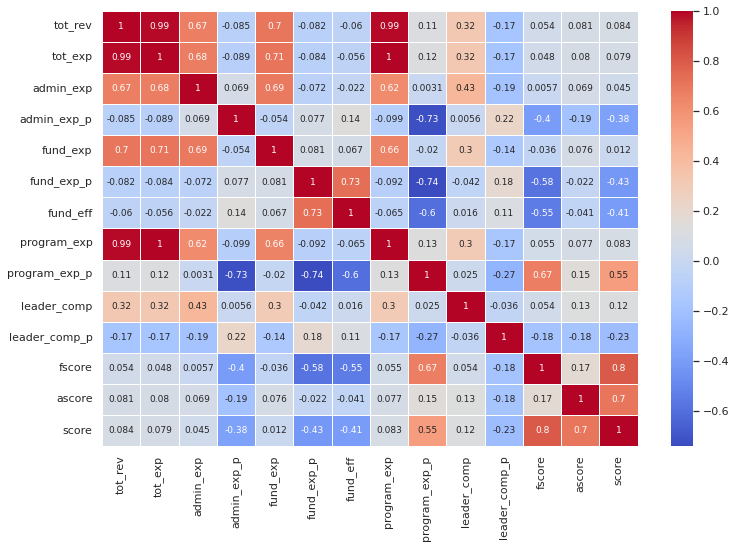

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(df_re.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
#\plt.title('Variable Correlation')


## **Observation after data exploring** 

### 1. Need to add column for the names of the states and their regions,through join another data set.
### 2. There are negative values in the total revenue.
### 3. Missing data in the compensation of leaders in the columns for percentages and amounts.
###4.There are outlier data in total revenues, total expenses, and all expenses columns because there are some charities their revenue amount more than billion.
### 5. Minimum values in the Financial Score and Compensation of Leader, Contain zeros.
### 6. some states have count of charities more than other states up to 900 charities while some states have between 1 to 20 charities.
### 7. about positive correlation  we have strong relations between total revenue and total expenses, also with program expenses up to 99%.
### 8.strong correlation between score and financial Score  , and also a strong correlation with accountability & Transparency Score.
### 9. About negative correlation we have strong relations between program expenses percentage and funding expenses percentage , administrative expenses percentage ,Funding Efficiency.
### 10. The category of the most popular charities in the United States is the Human Services Organization because  provide networks of direct services to people in need. They feed our hungry, strengthen our communities, shelter our homeless, care for our elderly, and nurture our young.






# Data Pre-processing 

## collect another data and join


In [26]:
#Need to add column for the names of the states and their regions,through join another data set.
state_df2=pd.read_csv('../input/usa-states-to-region/states.csv')

In [27]:
state_df2.head()

,State,State Code,Region,Division
0,Alaska,AK,West,Pacific
1,Alabama,AL,South,East South Central
2,Arkansas,AR,South,West South Central
3,Arizona,AZ,West,Mountain
4,California,CA,West,Pacific


In [28]:
state_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       51 non-null     object
 1   State Code  51 non-null     object
 2   Region      51 non-null     object
 3   Division    51 non-null     object
dtypes: object(4)
memory usage: 1.7+ KB


In [29]:
df_re_join=pd.merge(left=df_re,right=state_df2,left_on='state',right_on='State Code')

In [30]:
df_re_join.shape

(8404, 23)

In [31]:
df_re_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404 entries, 0 to 8403
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8404 non-null   object 
 1   state          8404 non-null   object 
 2   category       8404 non-null   object 
 3   subcategory    8404 non-null   object 
 4   tot_rev        8404 non-null   float64
 5   tot_exp        8404 non-null   float64
 6   size           8404 non-null   object 
 7   admin_exp      8404 non-null   float64
 8   admin_exp_p    8404 non-null   float64
 9   fund_exp       8404 non-null   float64
 10  fund_exp_p     8404 non-null   float64
 11  fund_eff       8404 non-null   float64
 12  program_exp    8404 non-null   float64
 13  program_exp_p  8404 non-null   float64
 14  leader_comp    7968 non-null   float64
 15  leader_comp_p  7968 non-null   float64
 16  fscore         8404 non-null   float64
 17  ascore         8404 non-null   float64
 18  score   

In [32]:
df_re_join.drop(['State Code',], axis=1,inplace=True)

In [33]:
df_re_join.rename(columns={"state": "state_code"},inplace=True)


In [34]:
df_re_join.drop(['Division',], axis=1,inplace=True)

In [35]:
df_re_join.columns

Index(['name', 'state_code', 'category', 'subcategory', 'tot_rev', 'tot_exp',
       'size', 'admin_exp', 'admin_exp_p', 'fund_exp', 'fund_exp_p',
       'fund_eff', 'program_exp', 'program_exp_p', 'leader_comp',
       'leader_comp_p', 'fscore', 'ascore', 'score', 'State', 'Region'],
      dtype='object')

In [36]:
df_re_join=df_re_join[[ 'tot_rev','name', 'state_code', 'State', 'Region', 'category', 'subcategory', 
       'size','tot_exp', 'admin_exp', 'admin_exp_p', 'fund_exp', 'fund_exp_p',
       'fund_eff', 'program_exp', 'program_exp_p', 'leader_comp',
       'leader_comp_p', 'fscore', 'ascore', 'score']]

In [37]:
df_re_join.head()

,tot_rev,name,state_code,State,Region,category,subcategory,size,tot_exp,admin_exp,...,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
0,1022513.0,1000 Friends of Oregon,OR,Oregon,West,Environment,Environmental Protection and Conservation,small,917313.0,92648.613,...,168785.592,0.184,0.18,654961.482,0.714,0.0,0.0000,88.61,100.0,91.94
1,2225964.0,InterAct Ministries,OR,Oregon,West,Religion,Religious Activities,small,2315997.0,416879.460,...,39371.949,0.017,0.01,1857429.594,0.802,26003.0,0.0112,81.12,88.0,84.18
2,6574033.0,JOIN,OR,Oregon,West,Human Services,Homeless Services,mid,6085088.0,383360.544,...,212978.080,0.035,0.03,5476579.200,0.900,81421.0,0.0133,92.50,93.0,92.74
3,4245386.0,Jewish Federation of Greater Portland,OR,Oregon,West,Community Development,Jewish Federations,mid,4202056.0,310952.144,...,458024.104,0.109,0.10,3424675.640,0.815,241999.0,0.0575,91.50,89.0,90.17
4,1975265.0,KIDS Center,OR,Oregon,West,Human Services,Children's and Family Services,small,1801660.0,109901.260,...,117107.900,0.065,0.09,1571047.520,0.872,111401.0,0.0618,95.00,89.0,91.45


In [38]:
df_re_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404 entries, 0 to 8403
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tot_rev        8404 non-null   float64
 1   name           8404 non-null   object 
 2   state_code     8404 non-null   object 
 3   State          8404 non-null   object 
 4   Region         8404 non-null   object 
 5   category       8404 non-null   object 
 6   subcategory    8404 non-null   object 
 7   size           8404 non-null   object 
 8   tot_exp        8404 non-null   float64
 9   admin_exp      8404 non-null   float64
 10  admin_exp_p    8404 non-null   float64
 11  fund_exp       8404 non-null   float64
 12  fund_exp_p     8404 non-null   float64
 13  fund_eff       8404 non-null   float64
 14  program_exp    8404 non-null   float64
 15  program_exp_p  8404 non-null   float64
 16  leader_comp    7968 non-null   float64
 17  leader_comp_p  7968 non-null   float64
 18  fscore  

## Data cleaning

In [39]:
# There are negative values in the total revenue.
df_re_join['tot_rev'] = df_re_join['tot_rev'].apply(lambda x: abs(x))

In [40]:
df_re_join.describe()

,tot_rev,tot_exp,admin_exp,admin_exp_p,fund_exp,fund_exp_p,fund_eff,program_exp,program_exp_p,leader_comp,leader_comp_p,fscore,ascore,score
count,8.404000e+03,8.404000e+03,8.404000e+03,8404.000000,8.404000e+03,8404.000000,8404.000000,8.404000e+03,8404.000000,7.968000e+03,7968.000000,8404.000000,8404.000000,8404.000000
mean,1.583382e+07,1.448935e+07,1.138949e+06,0.105757,8.932014e+05,0.087734,0.108120,1.243511e+07,0.805006,1.641679e+05,0.039061,85.948050,90.724298,86.867386
std,7.559389e+07,6.945342e+07,4.363717e+06,0.063388,4.356896e+06,0.064890,0.087997,6.350948e+07,0.094135,1.453488e+05,0.034742,9.756608,9.773249,8.047783
min,3.346100e+04,5.321300e+04,3.348400e+02,0.001000,3.328500e+02,0.001000,0.010000,3.500383e+04,0.047000,0.000000e+00,0.000000,0.000000,28.000000,14.480000
25%,2.022996e+06,1.942998e+06,1.788506e+05,0.063000,1.421605e+05,0.045000,0.050000,1.509136e+06,0.757000,8.997500e+04,0.015000,81.130000,89.000000,83.260000
50%,3.951672e+06,3.656917e+06,3.437180e+05,0.095000,2.936583e+05,0.077000,0.090000,2.930863e+06,0.814000,1.316015e+05,0.031500,87.460000,93.000000,88.310000
75%,9.791022e+06,8.859808e+06,7.745598e+05,0.135000,6.431633e+05,0.115000,0.140000,7.215094e+06,0.865000,1.977480e+05,0.053900,92.500000,97.000000,92.020000
max,3.608002e+09,3.142984e+09,1.574086e+08,0.742000,2.011510e+08,0.916000,1.430000,2.809828e+09,0.997000,3.691019e+06,0.532300,100.000000,100.000000,100.000000


In [41]:
#Missing data in the compensation of leaders in the columns for percentages and amounts.
df_re_join.isnull().sum()

tot_rev            0
name               0
state_code         0
State              0
Region             0
category           0
subcategory        0
size               0
tot_exp            0
admin_exp          0
admin_exp_p        0
fund_exp           0
fund_exp_p         0
fund_eff           0
program_exp        0
program_exp_p      0
leader_comp      436
leader_comp_p    436
fscore             0
ascore             0
score              0
dtype: int64

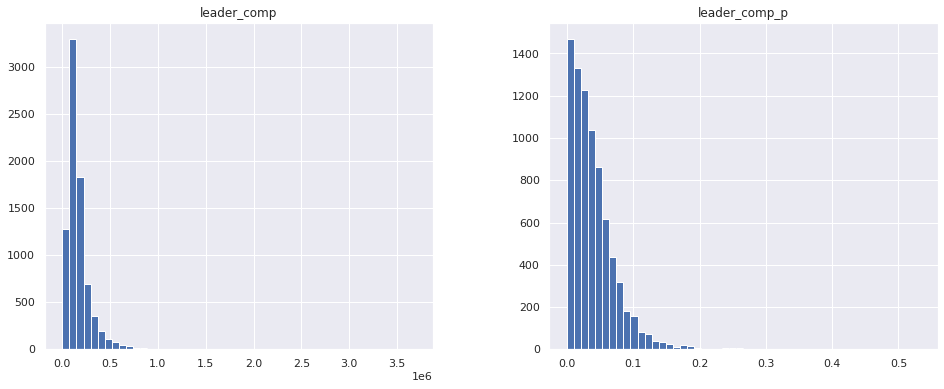

In [42]:
df_re_join[['leader_comp','leader_comp_p']].hist(bins=50,figsize=(16,6))
plt.show()

In [43]:
df_re_join['fund_exp_p'].describe()

count    8404.000000
mean        0.087734
std         0.064890
min         0.001000
25%         0.045000
50%         0.077000
75%         0.115000
max         0.916000
Name: fund_exp_p, dtype: float64

In [44]:
led_med=df_re_join['leader_comp_p'].median()
df_re_join['leader_comp_p'] = df_re_join['leader_comp_p'].fillna(led_med)

In [45]:
df_re_join.dropna(subset=["leader_comp"],inplace=True)

In [46]:
df_re_join.isnull().sum()

tot_rev          0
name             0
state_code       0
State            0
Region           0
category         0
subcategory      0
size             0
tot_exp          0
admin_exp        0
admin_exp_p      0
fund_exp         0
fund_exp_p       0
fund_eff         0
program_exp      0
program_exp_p    0
leader_comp      0
leader_comp_p    0
fscore           0
ascore           0
score            0
dtype: int64

#  Analysis

## Total Revenues Analysis

In [47]:
df_re_join['tot_rev'].describe()

count    7.968000e+03
mean     1.649447e+07
std      7.755471e+07
min      3.346100e+04
25%      2.093436e+06
50%      4.152339e+06
75%      1.027267e+07
max      3.608002e+09
Name: tot_rev, dtype: float64

In [48]:
px.histogram(df_re_join, x="tot_rev",)

In [49]:
# charities their revenue amount more than 250 million.
df_max=df_re_join[df_re_join['tot_rev']>=250000000]
df_max.shape

(61, 21)

(61, 21)


<AxesSubplot:xlabel='tot_rev', ylabel='name'>

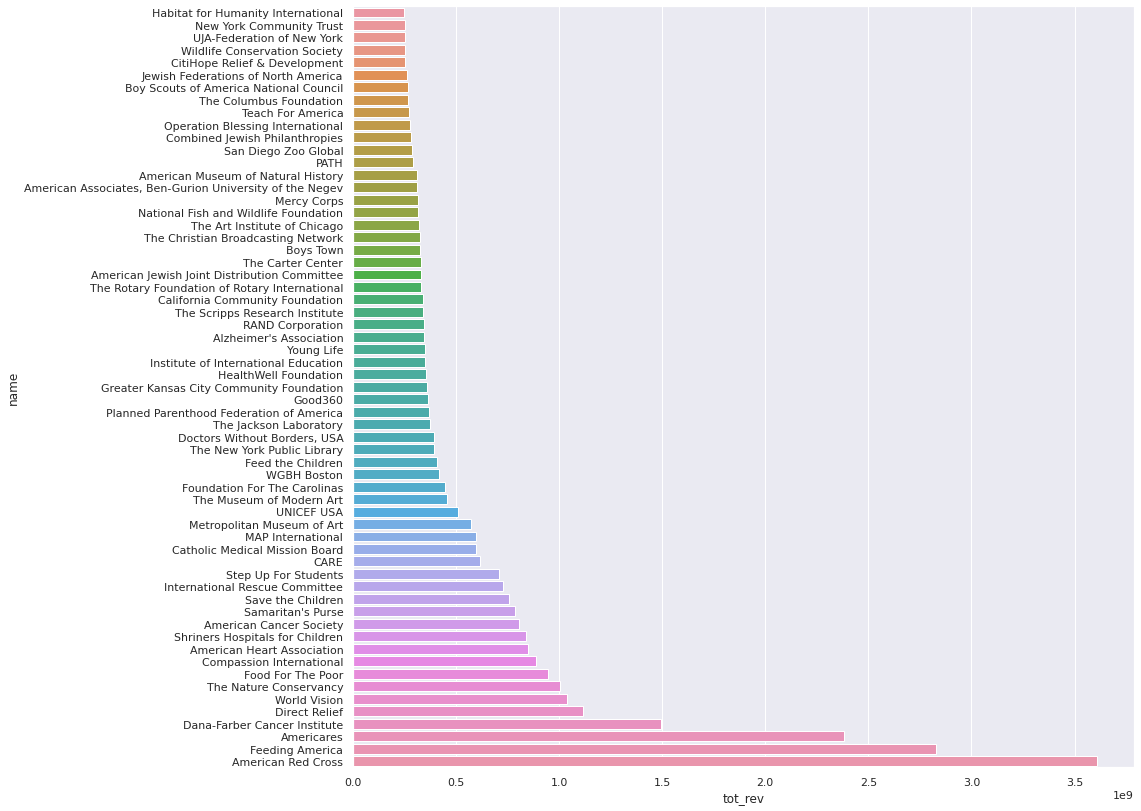

In [50]:
print(df_max.shape)
plt.figure(figsize=(14,14))

sns.barplot(x="tot_rev", y="name", data=df_max.sort_values('tot_rev'))

In [51]:
#charities their revenue amount less than half million.
df_min=df_re_join[df_re_join['tot_rev']<=500000]
df_min.shape

(50, 21)

(50, 21)


<AxesSubplot:xlabel='tot_rev', ylabel='name'>

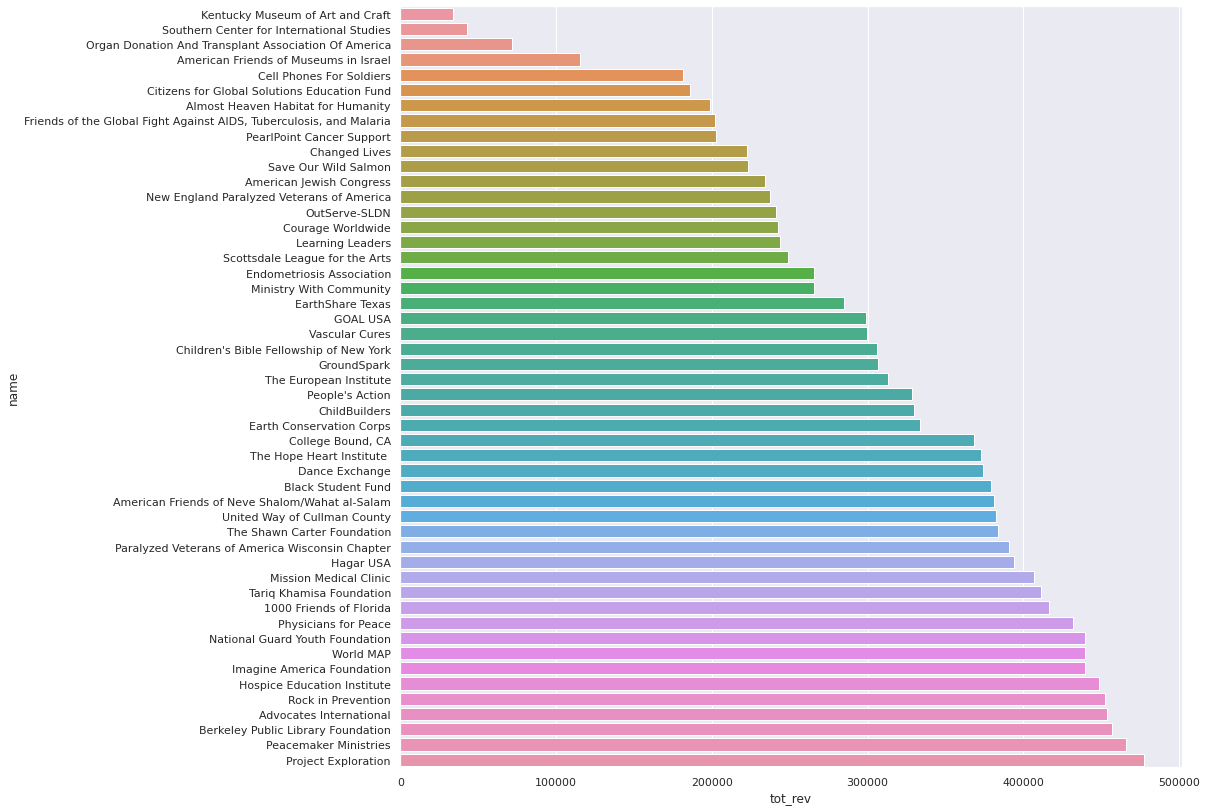

In [52]:
print(df_min.shape)
plt.figure(figsize=(14,14))
sns.barplot(x="tot_rev", y="name", data=df_min.sort_values('tot_rev'))

Text(0.5, 1.0, 'Variable Correlation')

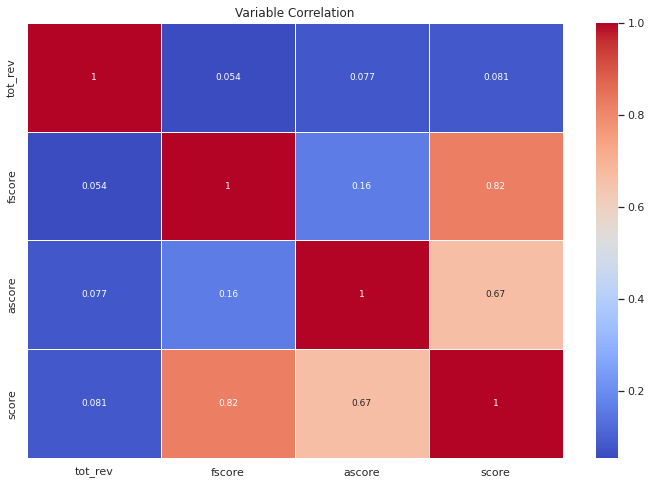

In [53]:
#Is there any correlation between  score & total_rev?
rev_corr=df_re_join[['tot_rev','fscore','ascore','score']]
plt.figure(figsize=(12,8))
sns.heatmap(rev_corr.corr(),cmap = 'coolwarm',linewidth = 1,annot= True, annot_kws={"size": 9})
plt.title('Variable Correlation')

#### isn't correlation between total revenue and any score



## Category Analysis

<AxesSubplot:title={'center':'categories by Revenue'}, xlabel='tot_rev', ylabel='category'>

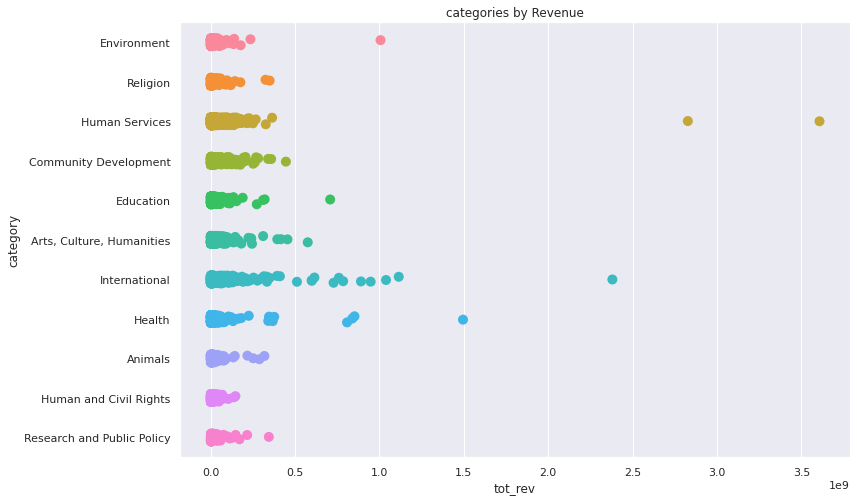

In [54]:
plt.figure(figsize=(12,8))
plt.title('categories by Revenue')
sns.stripplot(x="tot_rev", y="category", data=df_re_join,size=10)

<AxesSubplot:title={'center':'category by score'}, xlabel='score', ylabel='category'>

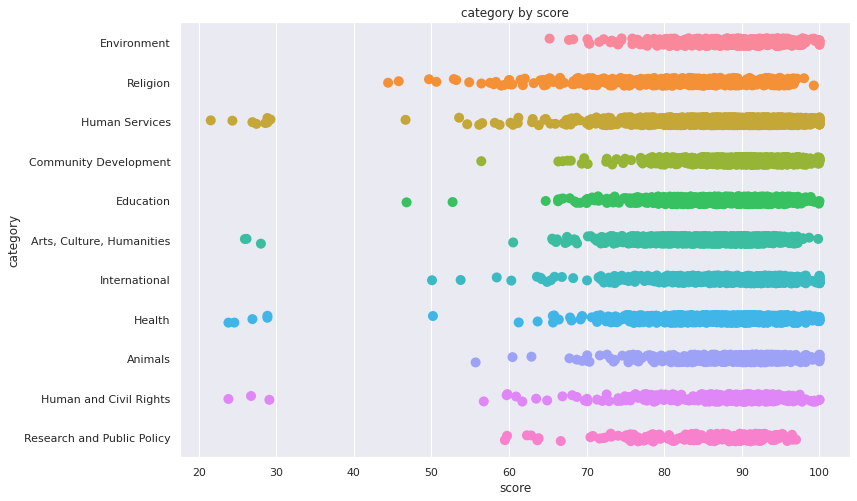

In [55]:
plt.figure(figsize=(12,8))
plt.title('category by score')
sns.stripplot(x="score", y="category", data=df_re_join,size=10,)


In [56]:
df_re_join[['category','State','Region']]

,category,State,Region
0,Environment,Oregon,West
1,Religion,Oregon,West
2,Human Services,Oregon,West
3,Community Development,Oregon,West
4,Human Services,Oregon,West
...,...,...,...
8398,Human Services,West Virginia,South
8400,"Arts, Culture, Humanities",West Virginia,South
8401,Health,West Virginia,South
8402,Human Services,West Virginia,South


In [57]:
cat_g = df_re_join.groupby(['category','Region','State']) \
       .agg(count=('category', 'size'), mean_score=('score', 'mean')) \
       .reset_index()
cat_g.head(3)

,category,Region,State,count,mean_score
0,Animals,Midwest,Illinois,14,88.669286
1,Animals,Midwest,Indiana,7,89.560000
2,Animals,Midwest,Iowa,3,87.843333


In [58]:
cat_g.shape

(483, 5)

<Figure size 864x576 with 0 Axes>

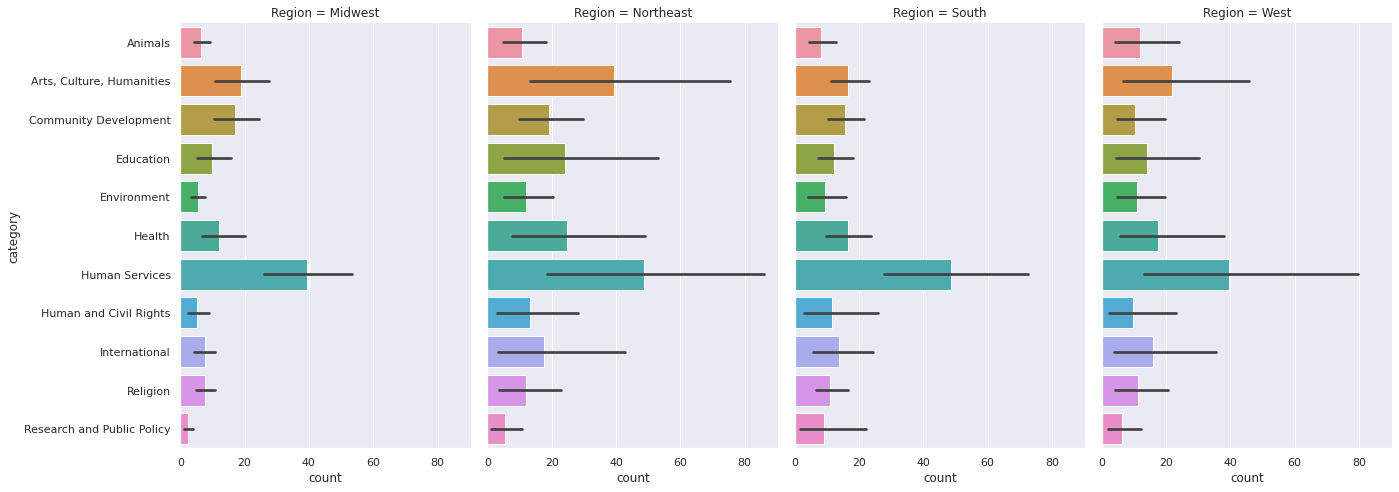

In [59]:
#categories by regions and their count
plt.figure(figsize=(12,8))
sns.catplot(x="count", y="category",
                col="Region",
                data=cat_g, kind="bar",
                height=7, aspect=.7);


<AxesSubplot:title={'center':'Categories by leaders compensation'}, xlabel='leader_comp_p', ylabel='category'>

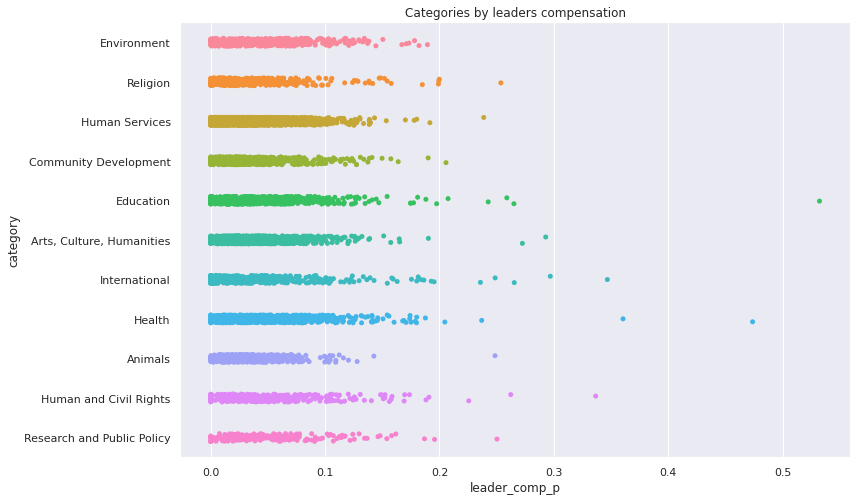

In [60]:
plt.figure(figsize=(12,8))
plt.title('Categories by leaders compensation')
sns.stripplot(x="leader_comp_p", y="category", data=df_re_join)


<AxesSubplot:title={'center':'Categories by administrative expenses percentage'}, xlabel='admin_exp_p', ylabel='category'>

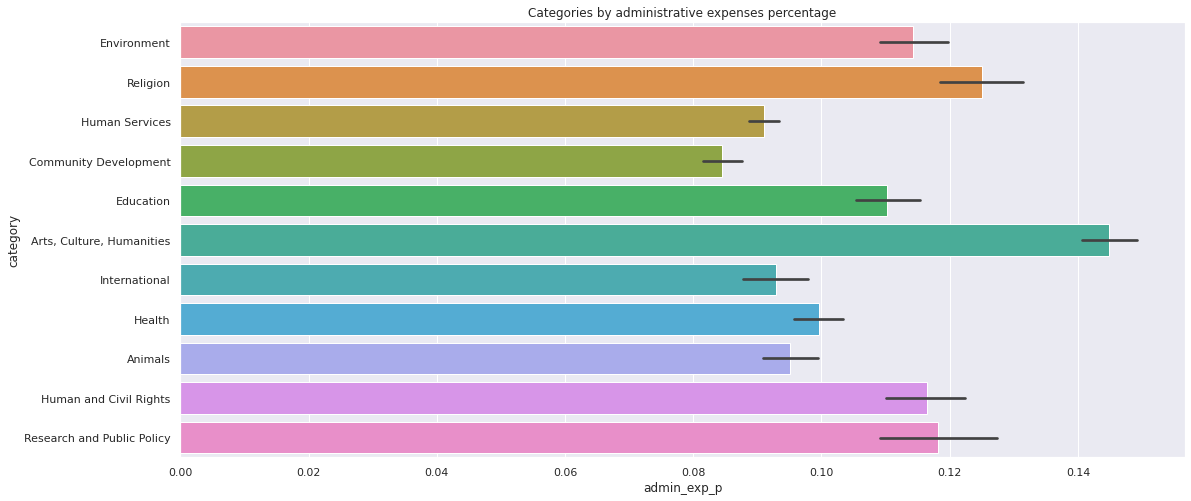

In [61]:
plt.figure(figsize=(18,8))
plt.title('Categories by administrative expenses percentage')
sns.barplot(x="admin_exp_p", y="category", data=df_re_join)



##  States Analysis

In [62]:
q1=df_re_join[['state_code','State','Region','score']]
q1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7968 entries, 0 to 8403
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   state_code  7968 non-null   object 
 1   State       7968 non-null   object 
 2   Region      7968 non-null   object 
 3   score       7968 non-null   float64
dtypes: float64(1), object(3)
memory usage: 569.3+ KB


In [63]:
q1['Region'].value_counts()

South        2688
Northeast    1928
West         1852
Midwest      1500
Name: Region, dtype: int64

In [64]:
q1_g = q1.groupby(['Region','State','state_code']) \
       .agg(count=('score', 'size'), mean_score=('score', 'mean')) \
       .reset_index()
q1_g.head()

,Region,State,state_code,count,mean_score
0,Midwest,Illinois,IL,295,87.598780
1,Midwest,Indiana,IN,122,86.984180
2,Midwest,Iowa,IA,47,87.925319
3,Midwest,Kansas,KS,55,87.422182
4,Midwest,Michigan,MI,189,87.084127


In [65]:
px.histogram(q1_g, x="count",title='Histogram for count of charities in states')

In [66]:
px.box(q1_g, y="count")


In [67]:
q1_g.columns

Index(['Region', 'State', 'state_code', 'count', 'mean_score'], dtype='object')

In [68]:
q1_g.nlargest(5,['mean_score',])

,Region,State,state_code,count,mean_score
43,West,Idaho,ID,16,89.228125
44,West,Montana,MT,40,89.161000
46,West,New Mexico,NM,36,88.753889
50,West,Wyoming,WY,13,88.726154
48,West,Utah,UT,47,88.667021


In [69]:
q1_g.nsmallest(5,['mean_score',])

,Region,State,state_code,count,mean_score
10,Midwest,South Dakota,SD,20,81.366000
38,West,Alaska,AK,16,83.461250
37,South,West Virginia,WV,12,83.739167
22,South,Arkansas,AR,25,84.362400
42,West,Hawaii,HI,28,84.393929


In [70]:
import plotly.graph_objects as go

fig = go.Figure(data=go.Choropleth(
    locations=q1_g['state_code'], # Spatial coordinates
    z = q1_g['mean_score'] , # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'RdBu',
    colorbar_title = "score",
))

fig.update_layout(
   title_text = ' States have the most rated charities, the least',
   geo_scope='usa', # limite map scope to USA
)

fig.show()


In [71]:
fig = px.bar(q1_g, x='State', y='mean_score',
              color='count',title="Sort states by score and count in descending order",
             labels={'mean_score':'mean of score','state_y':'The States'}, height=400)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},autosize=False,width=1300,height=500,)

fig.show()


In [72]:
fig = px.bar(q1_g, x='Region', y='mean_score',
              color='mean_score',title="Sort Region by score and count in descending order",
             labels={'mean_score':'count of charities  ','state_y':'The States'}, height=400)
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'},autosize=False,width=1300,height=500,)

fig.show()


<AxesSubplot:title={'center':'states by total revenue'}, xlabel='tot_rev', ylabel='State'>

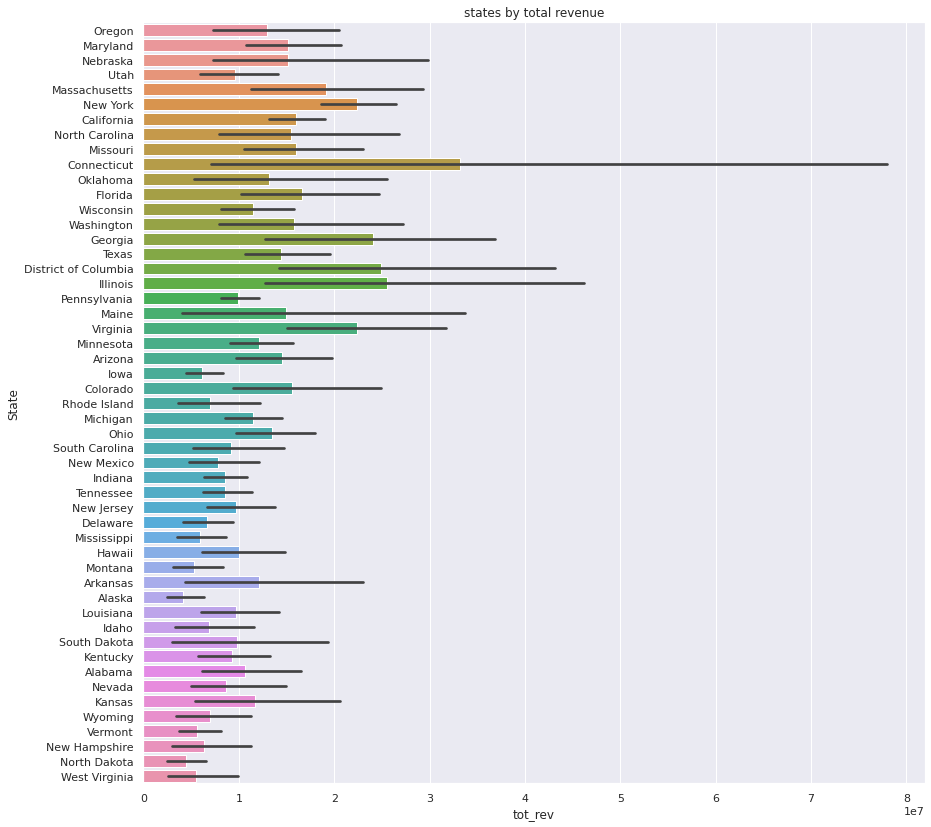

In [73]:
plt.figure(figsize=(14,14))
plt.title('states by total revenue')
sns.barplot(x="tot_rev", y="State", data=df_re_join)


<AxesSubplot:title={'center':'Region by total revenue'}, xlabel='Region', ylabel='tot_rev'>

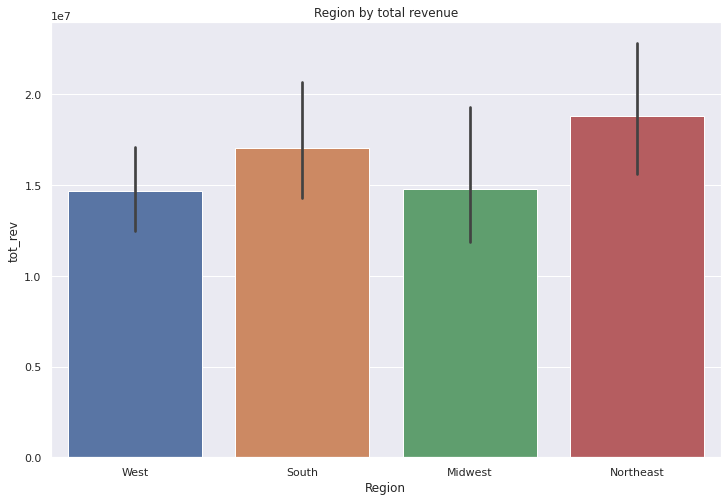

In [74]:
plt.figure(figsize=(12,8))
plt.title('Region by total revenue')
sns.barplot(x="Region", y="tot_rev", data=df_re_join)


## Funding Expenses Analysis

### Do larger or smaller charities spend more on fundraising efforts?

#### Fundraising Expenses: Charity Navigator rates organizations with at least 1% of its expenses allocated to fundraising for three consecutive years. Charities depending on the public for support fundraise to sustain their operations.

1 Dollar = 100 Cent

In [75]:
q2=df_re_join[['name','size','fund_eff','fund_exp','fund_exp_p','Region','State','tot_rev','category']]
q2.describe()

,fund_eff,fund_exp,fund_exp_p,tot_rev
count,7968.000000,7.968000e+03,7968.000000,7.968000e+03
mean,0.107968,9.258879e+05,0.087513,1.649447e+07
std,0.086705,4.465762e+06,0.062926,7.755471e+07
min,0.010000,3.328500e+02,0.001000,3.346100e+04
25%,0.050000,1.485713e+05,0.046000,2.093436e+06
50%,0.090000,3.066876e+05,0.078000,4.152339e+06
75%,0.140000,6.689595e+05,0.115000,1.027267e+07
max,1.430000,2.011510e+08,0.916000,3.608002e+09


In [76]:
fig_2 = px.box(q2, x='size', y="fund_eff",labels={'fund_eff':'fundraising efforts'}, height=600,title='Box plot for charities size based on their expenses by fundraising efforts')
fig_2.show()


In [77]:
q2_g = q2.groupby(['size']) \
       .agg(count=('fund_eff', 'sum'), mean_fund=('fund_eff', 'mean'),max_fund=('fund_eff', 'max')) \
       .reset_index()
q2_g.head()

,size,count,mean_fund,max_fund
0,big,127.56,0.089016,0.71
1,mid,304.98,0.107919,1.43
2,small,427.75,0.115328,1.22


<AxesSubplot:xlabel='category', ylabel='fund_eff'>

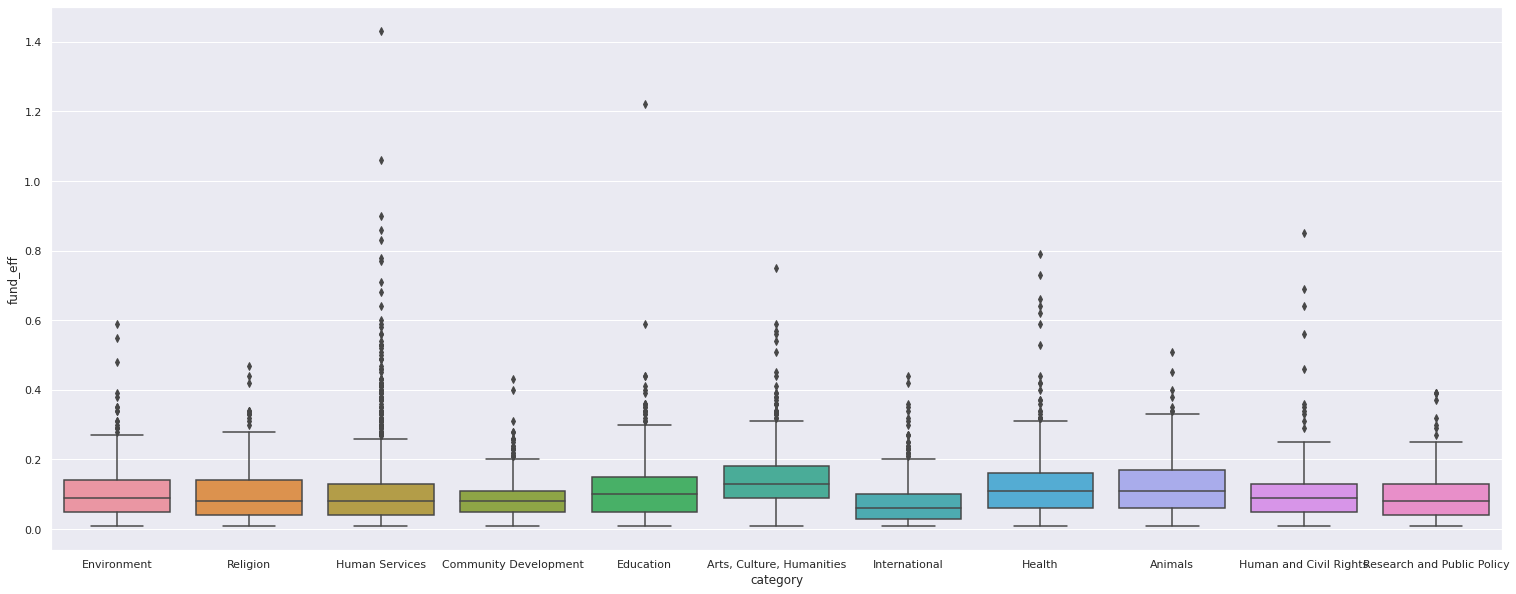

In [78]:
plt.figure(figsize=(26,10))

sns.boxplot(x="category", y="fund_eff", data=q2)
#Box plot for categories charities  by fundraising efforts


<AxesSubplot:xlabel='fund_eff', ylabel='Region'>

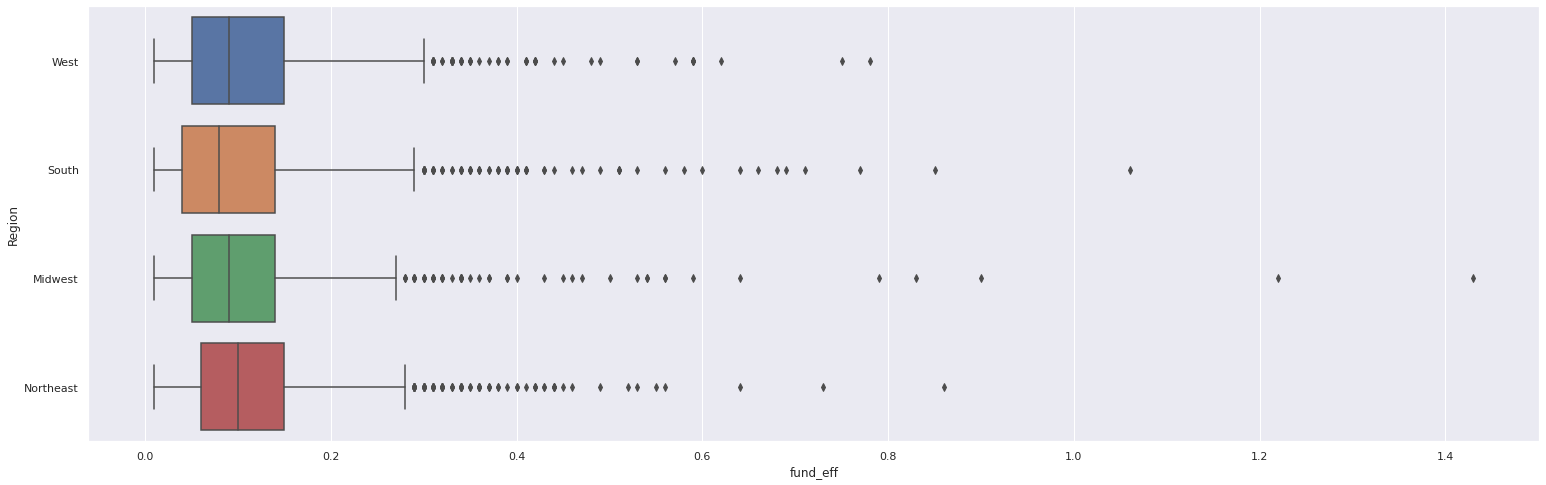

In [79]:
plt.figure(figsize=(26,8))

sns.boxplot(x="fund_eff", y="Region", data=q2)


## Is there any correlation between financial score & accountability score?

- Accountability is an obligation or willingness by a charity to explain its actions to its stakeholders.
- Transparency is an obligation or willingness by a charity to publish and make available critical data about the organization.

In [80]:
q4=df_re[['fscore','ascore','score']]
q4.describe()

,fscore,ascore,score
count,8408.000000,8408.000000,8408.000000
mean,85.946183,90.724905,86.866904
std,9.755404,9.771194,8.046299
min,0.000000,28.000000,14.480000
25%,81.130000,89.000000,83.260000
50%,87.460000,93.000000,88.310000
75%,92.500000,97.000000,92.020000
max,100.000000,100.000000,100.000000


<AxesSubplot:>

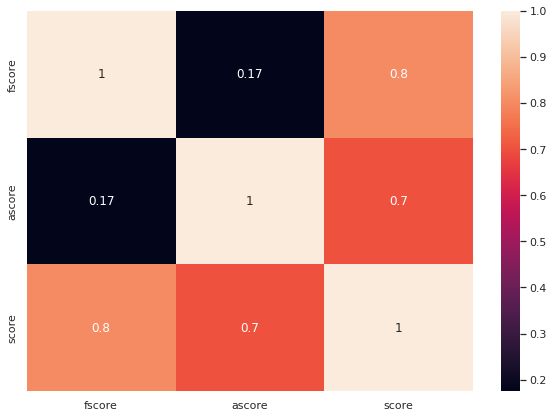

In [81]:
plt.figure(figsize=(10,7))

sns.heatmap(q4.corr(), annot = True)

In [82]:
q4.corr()

,fscore,ascore,score
fscore,1.000000,0.174822,0.801727
ascore,0.174822,1.000000,0.701910
score,0.801727,0.701910,1.000000


#Conclusions:-

### 1. 61 charities with a budget of more than $250 million.
### 2. 50 charities with a budget of less than 500,000.
### 3. More than half of charities are of small size.
### 4. There is no correlation between revenue and any score rate.
### 5. The most categories are human services, arts and culture, education, and health.
### 6. Most charities give compensation to leaders are of categories (international, education and health).
### 7. Most charities have high administrative expenses, which are the categories (arts, culture and religion), because their effectiveness is linked to the work of events and seminars and the preservation of heritage and identity.
### 8. Most charities are located in the south region.
### 9. northeast region has the highest revenue.
### 10. West Region has the highest rated scores.
### 11. Both California and New York have more than 900 charities.
### 12. Connecticut  state has the highest revenue.
### 13.Charities are small in size, pay funding expenses for each dollar more others, and this is logical because they are small in size and make a more effort to expand the segment of donors more than large charities.
### 14.Charities (international, religious) are less than spending funding expenses.


# Training and testing the model:

In [83]:
df=df_re_join.copy()

In [84]:
df.shape

(7968, 21)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7968 entries, 0 to 8403
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tot_rev        7968 non-null   float64
 1   name           7968 non-null   object 
 2   state_code     7968 non-null   object 
 3   State          7968 non-null   object 
 4   Region         7968 non-null   object 
 5   category       7968 non-null   object 
 6   subcategory    7968 non-null   object 
 7   size           7968 non-null   object 
 8   tot_exp        7968 non-null   float64
 9   admin_exp      7968 non-null   float64
 10  admin_exp_p    7968 non-null   float64
 11  fund_exp       7968 non-null   float64
 12  fund_exp_p     7968 non-null   float64
 13  fund_eff       7968 non-null   float64
 14  program_exp    7968 non-null   float64
 15  program_exp_p  7968 non-null   float64
 16  leader_comp    7968 non-null   float64
 17  leader_comp_p  7968 non-null   float64
 18  fscore  

In [86]:
df.drop(['name', 'state_code','category','subcategory','State'], axis = 1,inplace=True)

In [87]:
df.drop(['admin_exp', 'fund_exp','program_exp','leader_comp'], axis = 1,inplace=True)

In [88]:
from sklearn.preprocessing import LabelEncoder

In [89]:
le = LabelEncoder()

In [90]:
size_le = LabelEncoder()
Region_le = LabelEncoder()

In [91]:
type(size_le)

sklearn.preprocessing._label.LabelEncoder

In [92]:
df['size'] = size_le.fit_transform(df['size'])

In [93]:
size_le.classes_

array(['big', 'mid', 'small'], dtype=object)

In [94]:
df['size'].value_counts()

2    3709
1    2826
0    1433
Name: size, dtype: int64

In [95]:
df['Region'] = Region_le.fit_transform(df['Region'])

In [96]:
Region_le.classes_

array(['Midwest', 'Northeast', 'South', 'West'], dtype=object)

In [97]:
df['Region'].value_counts()

2    2688
1    1928
3    1852
0    1500
Name: Region, dtype: int64

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7968 entries, 0 to 8403
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   tot_rev        7968 non-null   float64
 1   Region         7968 non-null   int64  
 2   size           7968 non-null   int64  
 3   tot_exp        7968 non-null   float64
 4   admin_exp_p    7968 non-null   float64
 5   fund_exp_p     7968 non-null   float64
 6   fund_eff       7968 non-null   float64
 7   program_exp_p  7968 non-null   float64
 8   leader_comp_p  7968 non-null   float64
 9   fscore         7968 non-null   float64
 10  ascore         7968 non-null   float64
 11  score          7968 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 1.0 MB


In [99]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

In [100]:
df.head()

,tot_rev,Region,size,tot_exp,admin_exp_p,fund_exp_p,fund_eff,program_exp_p,leader_comp_p,fscore,ascore,score
0,1022513.0,3,2,917313.0,0.101,0.184,0.18,0.714,0.0000,88.61,100.0,91.94
1,2225964.0,3,2,2315997.0,0.180,0.017,0.01,0.802,0.0112,81.12,88.0,84.18
2,6574033.0,3,1,6085088.0,0.063,0.035,0.03,0.900,0.0133,92.50,93.0,92.74
3,4245386.0,3,1,4202056.0,0.074,0.109,0.10,0.815,0.0575,91.50,89.0,90.17
4,1975265.0,3,2,1801660.0,0.061,0.065,0.09,0.872,0.0618,95.00,89.0,91.45


In [101]:
x=df.iloc[:,0:11].values
y=df['score'].values

In [102]:
x

array([[1.022513e+06, 3.000000e+00, 2.000000e+00, ..., 0.000000e+00,
        8.861000e+01, 1.000000e+02],
       [2.225964e+06, 3.000000e+00, 2.000000e+00, ..., 1.120000e-02,
        8.112000e+01, 8.800000e+01],
       [6.574033e+06, 3.000000e+00, 1.000000e+00, ..., 1.330000e-02,
        9.250000e+01, 9.300000e+01],
       ...,
       [2.629970e+07, 2.000000e+00, 1.000000e+00, ..., 5.530000e-02,
        8.707000e+01, 8.800000e+01],
       [6.811665e+06, 2.000000e+00, 1.000000e+00, ..., 8.200000e-03,
        8.849000e+01, 1.000000e+02],
       [1.629917e+06, 2.000000e+00, 2.000000e+00, ..., 4.040000e-02,
        6.994000e+01, 1.000000e+02]])

In [103]:
y

array([91.94, 84.18, 92.74, ..., 87.52, 91.86, 78.74])

In [104]:
Lm=LinearRegression()

In [105]:
Sc=StandardScaler()

In [106]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [107]:
X_train.shape

(5577, 11)

In [108]:
y_train.shape

(5577,)

In [109]:
X_test.shape

(2391, 11)

In [110]:
X_train=Sc.fit_transform(X_train)

In [111]:
X_test=Sc.fit_transform(X_test)

In [112]:
Lm.fit(X_train,y_train)

LinearRegression()

In [113]:
Lm.intercept_

87.26549578626506

In [114]:
Lm.coef_

array([-0.06283422, -0.01468524, -0.016847  ,  0.06414934,  1.40664253,
        1.07962436,  0.10852785,  1.82492389,  0.0512998 ,  5.57528319,
        4.19486268])

In [115]:
y_pred=Lm.predict(X_test)

In [116]:
y_pred

array([60.30511352, 90.28741403, 85.12325543, ..., 91.33277657,
       73.59965772, 90.09021717])

In [117]:
y_test

array([54.86, 91.1 , 86.05, ..., 91.61, 63.18, 91.21])

In [118]:
mean_squared_error(y_test,y_pred)

1.8853787037050938

In [119]:
Lm.score(X_train,y_train)

0.9691065394394269

In [120]:
Lm.score(X_test,y_test)

0.9677685348003275

##Ridge Regression

In [121]:
from sklearn.linear_model import Ridge,Lasso

In [122]:
alphas=np.random.randint(1,100,50)

In [123]:
regressor=Ridge()

In [124]:
training_accuracy=[]
testing_accuracy=[]
for i in range(1,1000):
  regressor=Ridge(alpha=i)
  regressor.fit(X_train,y_train)
  training_accuracy.append(regressor.score(X_train,y_train))
  testing_accuracy.append(regressor.score(X_test,y_test))

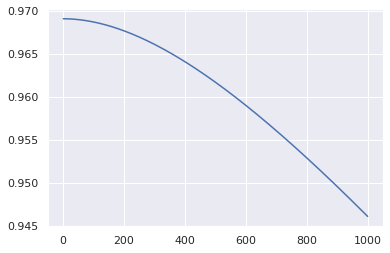

In [125]:
sns.lineplot(x=[i for i in range(1,1000)],y=training_accuracy);

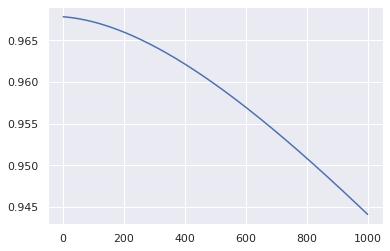

In [126]:
sns.lineplot(x=[i for i in range(1,1000)],y=testing_accuracy);


## RMSE

In [127]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [128]:
rmse=np.sqrt(mean_squared_error(y_pred,y_test))

In [129]:
rmse

1.3730909306033208

## Report

In [130]:
import statsmodels.api as st
from scipy import  stats

In [131]:
x3=st.add_constant(X_train)
est=st.OLS(y_train,x3)
est3=est.fit()
print (est3.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.969
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                 1.587e+04
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        06:13:53   Log-Likelihood:                -9495.2
No. Observations:                5577   AIC:                         1.901e+04
Df Residuals:                    5565   BIC:                         1.909e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.2655      0.018   4902.271      0.0

In [132]:
x4=st.add_constant(X_test)
est=st.OLS(y_test,x4)
est4=est.fit()
print (est4.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     6578.
Date:                Tue, 21 Dec 2021   Prob (F-statistic):               0.00
Time:                        06:13:54   Log-Likelihood:                -4135.9
No. Observations:                2391   AIC:                             8296.
Df Residuals:                    2379   BIC:                             8365.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         87.3369      0.028   3121.767      0.0

##Random Forest

In [133]:
from sklearn.ensemble import RandomForestRegressor

In [134]:
reg=RandomForestRegressor(n_estimators=100,max_depth=5,max_features=11)

In [135]:
reg.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, max_features=11)

In [136]:
reg.score(X_train,y_train)

0.9822511401426302

In [137]:
reg.score(X_test,y_test)

0.9809450488548649

## XGBoost

In [138]:
from xgboost import XGBRegressor

In [139]:
xgb=XGBRegressor(learning_rate=0.3,max_depth=5)

In [140]:
xgb.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.3, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [141]:
xgb.score(X_train,y_train)

0.9998546937440943

In [142]:
xgb.score(X_test,y_test)

0.9966631469450526